# IMPORT LIBRARIES

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from env import user, password, host
from scipy import stats
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from datetime import datetime
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
# ?from pandas_profiling import ProfileReport

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

sns.set(color_codes=True)

from datetime import datetime

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

# ACQUIRE

In [3]:
def get_311_data():
    ''' 
    This function reads in a csv held in the same repository folder
    '''
    df = pd.read_csv('data_311.csv')
    return df


In [4]:
df=get_311_data()

# SUMMARIZE DATA 
#### WHAT DO WE HAVE HERE?

In [5]:
# return first df rows
df.head()

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
0,139344,Miscellaneous,1014127378,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
1,139344,Field Operations,1014127380,1/1/18 8:39,1/1/18 12:30,9/26/20 8:39,NO,-998.84,YES,Stray Animal,999.00,Closed,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
2,139344,Signals,1014127389,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
3,139344,Streets,1014127390,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
4,139344,Signals,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza


#### Looks like a log of calls for city service departments

In [6]:
# return last df rows
df.tail()

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
855264,svcCRMSS,Field Operations,1014127272,12/31/17 18:35,12/31/17 18:45,12/31/17 21:35,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,FAY AVE and LYELL,5,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855265,svcCRMSS,Field Operations,1014127283,12/31/17 19:08,12/31/17 22:03,12/31/17 22:08,NO,-0.00,YES,Animal Cruelty(Critical),0.12,Closed,"207 COVINGTON RD, San Antonio, 78220",2,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855266,svcCRMSS,Field Operations,1014127299,12/31/17 19:50,12/31/17 19:58,12/31/17 22:50,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,"928 LEAL ST, San Antonio, 78207",1,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855267,svcCRMSS,Field Operations,1014127312,12/31/17 21:07,12/31/17 21:12,1/1/18 0:07,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,PALMETTO WAY and LEXI PETAL,0,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855268,svcCRMSS,Field Operations,1014127322,12/31/17 22:04,12/31/17 22:09,1/1/18 1:04,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,"233 THEO AVE E, San Antonio, 78214",3,Animal Care Services,Animal Care Services,YES,133,svcCRMSS


In [7]:
#list column names
df.columns

Index(['source_id', 'dept_division', 'case_id', 'case_opened_date',
       'case_closed_date', 'SLA_due_date', 'case_late', 'num_days_late',
       'case_closed', 'service_request_type', 'SLA_days', 'case_status',
       'request_address', 'council_district', 'dept_name',
       'standardized_dept_name', 'dept_subject_to_SLA', 'index',
       'source_username'],
      dtype='object')

#### Might need to see if columns have REDUNDANCY and see if column will be useful 

In [8]:
# give numerical data, stats, min, max, quartile info
df.describe()

,case_id,num_days_late
count,"855,269.00","855,235.00"
mean,"1,013,967,766.62",-49.18
std,"442,275.69",177.04
min,"1,013,225,542.00","-1,417.00"
25%,"1,013,580,953.00",-37.99
50%,"1,013,947,946.00",-5.01
75%,"1,014,349,641.00",-1.83
max,"1,014,759,620.00",519.70


In [9]:
df.describe(include='all')

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
count,855269,855269,"855,269.00",855269,836936,855235,855269,"855,235.00",855269,855269,"855,235.00",855269,855269,"855,269.00",855071,855269,855268,"855,268.00",855261
unique,164,39,NaN,342441,297942,302669,2,NaN,2,341,"149,039.00",7,260062,24.00,11,10,3,214.00,140
top,CRM_Listener,Code Enforcement,NaN,6/18/18 2:21,9/6/17 12:00,1/5/18 8:30,NO,NaN,YES,No Pickup,5.00,Closed,"10133 FIGARO CANYON, San Antonio, 78251",1.00,Code Enforcement Services,DSD/Code Enforcement,YES,58.00,CRM_Listener
freq,195416,274298,NaN,35,525,1460,759122,NaN,836936,89210,"72,467.00",836928,5150,"96,470.00",321976,323571,855227,"121,562.00",195408
mean,NaN,NaN,"1,013,967,766.62",NaN,NaN,NaN,NaN,-49.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,"442,275.69",NaN,NaN,NaN,NaN,177.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,"1,013,225,542.00",NaN,NaN,NaN,NaN,"-1,417.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,"1,013,580,953.00",NaN,NaN,NaN,NaN,-37.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,"1,013,947,946.00",NaN,NaN,NaN,NaN,-5.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,"1,014,349,641.00",NaN,NaN,NaN,NaN,-1.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# list number columns and rows, data types,and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855269 entries, 0 to 855268
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   source_id               855269 non-null  object 
 1   dept_division           855269 non-null  object 
 2   case_id                 855269 non-null  int64  
 3   case_opened_date        855269 non-null  object 
 4   case_closed_date        836936 non-null  object 
 5   SLA_due_date            855235 non-null  object 
 6   case_late               855269 non-null  object 
 7   num_days_late           855235 non-null  float64
 8   case_closed             855269 non-null  object 
 9   service_request_type    855269 non-null  object 
 10  SLA_days                855235 non-null  object 
 11  case_status             855269 non-null  object 
 12  request_address         855269 non-null  object 
 13  council_district        855269 non-null  object 
 14  dept_name           

#### Most are object but case_id is an integer and num_days_late is a float. Also, I might want to organize it by the case_id, or by date, maybe by case_opened_date.

In [11]:
# number null values in each column
df.isnull().sum()

source_id                     0
dept_division                 0
case_id                       0
case_opened_date              0
case_closed_date          18333
SLA_due_date                 34
case_late                     0
num_days_late                34
case_closed                   0
service_request_type          0
SLA_days                     34
case_status                   0
request_address               0
council_district              0
dept_name                   198
standardized_dept_name        0
dept_subject_to_SLA           1
index                         1
source_username               8
dtype: int64

In [12]:
missing = df.isnull().sum()
missing[missing >0]

case_closed_date       18333
SLA_due_date              34
num_days_late             34
SLA_days                  34
dept_name                198
dept_subject_to_SLA        1
index                      1
source_username            8
dtype: int64

In [13]:
18333/855269

0.021435361272301463

#### But it isn't a large amount (only 2.1%), so I will consider dropping columns with nulls

#### NOTE for the cells below. I know that the following is a bit much, but I really need to see how the data is formatted

In [14]:
# unique values of column
df.source_id.unique() 

array([139344, 124405, 135723, 139342, 136202, 141549, 140987, 132408,
       119555, 141239, 140508, 140637, 141256, 140436, 139868, 138650,
       120752, 138793, 139345, 138810, 138605, 100137, 139807, 141954,
       141752, 142659, 142673, 142738, 106463, 142989, 119868, 142991,
       119403, 137943, 136979, 140509, 140507, 140992, 140991, 141241,
       141240, 103582, 142088, 142087, '138810', '141241', '135723',
       '139344', '142087', '138793', '119555', '141549', '141239',
       '132408', '140987', '140436', '140508', '142088', '139345',
       '136202', '140637', '120752', '139868', '124405', '138605',
       '100137', '141256', '139342', 'svcCRMSS', 'ns16326', 'svcCRMLS',
       'CRM_Listener', 'rs16746', 'mt13131', 'NO10960', 'jw10936',
       'mc21309', 'cc17850', 'mp21218', 'MW16328', 'dc12381', 'gp20685',
       'eg16317', 'dl05036', 'mt23152', 'ss21394', 'ss09159', 'sg22264',
       'bn26322', 'sv24848', 'dd26293', 'FC24472', 'FR26584', 'gg14829',
       'DS15677',

In [15]:
# number of unique values
df.source_id.nunique() 

164

In [16]:
# unique values of column
df.dept_division.unique() 

array(['Miscellaneous', 'Field Operations', 'Signals', 'Streets',
       'Code Enforcement', 'Traffic Engineering Design', 'Brush',
       'Signs and Markings', 'Waste Collection', '311 Call Center',
       'Graffiti', 'Storm Water', 'Engineering Division',
       'Dangerous Premise', 'Trades', 'Food Establishments',
       'Facility License', 'Solid Waste', "Director's Office Horizontal",
       'Clean and Green', 'Vector', 'Shops', 'District 2', 'Tree Crew',
       'District 1', 'District 6', 'District 8', 'District 9',
       'District 7', 'Clean and Green Natural Areas', 'District 10',
       'Graffiti (IntExp)', 'District 3', 'Reservations',
       'Dangerous Premise (IntExp)', 'Code Enforcement (IntExp)',
       'Code Enforcement (Internal)', 'Shops (Internal)',
       'Storm Water Engineering'], dtype=object)

In [17]:
# number of unique values
df.dept_division.nunique()

39

In [18]:
# unique values of column
df.case_id.unique() 

array([1014127378, 1014127380, 1014127389, ..., 1014127299, 1014127312,
       1014127322])

In [19]:
# number of unique values
df.case_id.nunique()

841592

In [20]:
# unique values of column
df.case_opened_date.unique() 

array(['1/1/18 8:24', '1/1/18 8:39', '1/1/18 9:02', ..., '12/31/17 19:08',
       '12/31/17 19:50', '12/31/17 21:07'], dtype=object)

In [21]:
# number of unique values
df.case_opened_date.nunique()

342441

In [22]:
# unique values of column
df.case_closed_date.unique() 

array(['1/2/18 7:37', '1/1/18 12:30', '1/1/18 10:12', ...,
       '12/31/17 22:03', '12/31/17 19:58', '12/31/17 22:09'], dtype=object)

In [23]:
# number of unique values
df.case_closed_date.nunique()

297942

In [24]:
# unique values of column
df.SLA_due_date.unique() 

array(['1/3/18 8:24', '9/26/20 8:39', '1/3/18 8:30', ...,
       '12/31/17 22:50', '1/1/18 0:07', '1/1/18 1:04'], dtype=object)

In [25]:
# number of unique values
df.SLA_due_date.nunique()

302669

In [26]:
# unique values of column
df.case_late.unique() 

array(['NO', 'YES'], dtype=object)

In [27]:
# number of unique values
df.case_late.nunique()

2

In [28]:
# unique values of column
df.num_days_late.unique() 

array([-1.03287037e+00, -9.98839687e+02, -1.92891204e+00, ...,
       -5.96753472e+00, -6.88657407e-01, -1.21712963e-01])

In [29]:
# number of unique values
df.num_days_late.nunique()

599211

In [30]:
# unique values of column
df.case_closed.unique() 

array(['YES', 'NO'], dtype=object)

In [31]:
# number of unique values
df.case_closed.nunique()

2

In [32]:
# unique values of column
df.service_request_type.unique() 

array(['Dead Animal - Cat', 'Stray Animal',
       'Traffic Signal Ops and Maintenance - Emergency',
       'Barricade Pick Up', 'Animal Neglect', 'Dead Animal - Dog',
       'Aggressive Animal(Non-Critical)', 'Trapped/Confined Animal',
       'Dead Animal - Misc', 'Public Nuisance(Own Animal)',
       'Officer Standby', 'Injured Animal(Critical)',
       'Signal Timing Modification', 'Minimum Housing-Owner Occupied',
       'Minimum Housing-Tenant Occupied', 'Animal Permits Request',
       'Flashing Beacon New Request',
       'Illegal Dumping (Non- residential areas)', 'Traffic Sign Faded',
       'Overgrown Yard/Trash', 'Solid Waste Fees and Charges',
       'Base/Pavement Repair', 'Cart Delivery',
       'Vacant Lot/Overgrown/Trash', 'Water No Services', 'Damaged Cart',
       'Low Hanging Limbs on Streets/Sidewalk', 'Scattered Material',
       'Pot Hole Repair', 'Complaint', 'Cart Exchange Request',
       'Additional Garbage Container - with Fee', 'Cart PickUp',
       '1st Cal

In [33]:
# number of unique values
df.service_request_type.nunique()

341

In [34]:
# unique values of column
df.SLA_days.unique() 

array([2.0, 999.0, 1.977453704, ..., 16.68256944, 65.67908565,
       3.662974537], dtype=object)

In [35]:
# number of unique values
df.SLA_days.nunique()

149039

In [36]:
# unique values of column
df.case_status.unique() 

array(['Closed', 'Open', 'Code Enforcement Services', ' 78210"',
       ' 78201"', ' 78223"', ' 78212"'], dtype=object)

In [37]:
# number of unique values
df.case_status.nunique()

7

In [38]:
# unique values of column
df.request_address.unique() 

array(['7059  TIMBERCREEK DR, San Antonio, 78227',
       'FREDSBG RD and NB LOOP 410 NW', 'CESAR CHAVEZ W and S ZARZAMORA',
       ..., '10270  WEYBRIDGE, San Antonio, 78250',
       'SANDY TRAIL and SPOTTED TRAIL', 'PALMETTO WAY and LEXI PETAL'],
      dtype=object)

In [39]:
# number of unique values
df.request_address.nunique()

260062

In [40]:
# unique values of column
df.council_district.unique() 

array([6, 7, 5, 1, 2, 4, 3, 10, 8, 9, 0, '2', '5', '10', '0', '1', '7',
       '8', '4', '9', '6', '3', 'YES', 'Code Enforcement Services'],
      dtype=object)

#### Note for above, may need to convert all numbers to int or str because their are only 10 city council districts

In [41]:
# number of unique values
df.council_district.nunique()

24

In [42]:
# unique values of column
df.dept_name.unique() 

array(['Solid Waste Management', 'Animal Care Services',
       'Trans & Cap Improvements', 'Code Enforcement Services',
       'Customer Service', 'Development Services', 'Parks and Recreation',
       'Metro Health', 'City Council', nan, '58', 'DSD/Code Enforcement'],
      dtype=object)

In [43]:
# number of unique values
df.dept_name.nunique()

11

In [44]:
# unique values of column
df.standardized_dept_name.unique() 

array(['Solid Waste', 'Animal Care Services', 'Trans & Cap Improvements',
       'DSD/Code Enforcement', 'Customer Service', 'Parks & Recreation',
       'Metro Health', 'City Council', 'CRM_Listener', 'YES'],
      dtype=object)

In [45]:
# number of unique values
df.standardized_dept_name.nunique()

10

In [46]:
# unique values of column
df.dept_subject_to_SLA.unique() 

array(['YES', 'NO', nan, '58'], dtype=object)

#### may need to drop rows with 58 or nan because it is a yes or no

In [47]:
# number of unique values
df.dept_subject_to_SLA.nunique()

3

In [48]:
# unique values of column
df.index.unique() 

RangeIndex(start=0, stop=855269, step=1)

In [49]:
# number of unique values
df.index.nunique()

855269

In [50]:
# unique values of column
df.source_username.unique() 

array(['Isis Mendoza', 'Lori Lara', 'Amy Cardenas', 'Jessica Mendoza',
       'Michelle Urrutia', 'Mariana Rios', 'Melissa Carmona',
       'Leonard Silva', 'Socorro Quiara', 'Erica Flores',
       'San Juanita Villarreal', 'Andrew Trexler',
       'Michelle Lingenfelder', 'Jose Acosta', 'James Garcia',
       'Kimberly Green-Woods', 'Kimberly Green', 'Eva T. Kleiber',
       'Guadalupe Rodriguez', 'Andrea Alvarez', 'Tawona Martin',
       'Marisa Ozuna', 'Merlene Blodgett', 'Jerry Robles',
       'Janelle Lopez', 'Matthew Gilbert', 'Marisol Villarreal',
       'Priscilla Tillman', 'Pamela Boykin', 'Richard Sanchez',
       'Samantha McLaughlin', 'Michelle San Miguel', 'Ebony Ruffin',
       'Betty De Hoyos', 'Pamela K. Baccus', 'Leticia Garcia',
       'Renee Key', 'Beatriz Urbina', 'Refugio Campos', 'Elisa Tejeda',
       'Latreece Towers', 'Anastasia Harrison', 'Carmen Cura',
       'Jessica Pina', 'Genese Woisin', 'svcCRMSS', 'Norma K. Sotoodeh',
       'svcCRMLS', 'CRM_Listener', 

In [51]:
# number of unique values
df.source_username.nunique()

140

# Notes on the above. 
#### I see 'errors' in some of the values, since I do not have a data dictionary, and I not sure what some mean

In [52]:
df.case_opened_date.min(), df.case_opened_date.max()


('1/1/17 10:03', '9/9/17 9:59')

In [53]:
df.head(50)

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
0,139344,Miscellaneous,1014127378,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
1,139344,Field Operations,1014127380,1/1/18 8:39,1/1/18 12:30,9/26/20 8:39,NO,-998.84,YES,Stray Animal,999.00,Closed,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
2,139344,Signals,1014127389,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
3,139344,Streets,1014127390,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
4,139344,Signals,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
5,139344,Field Operations,1014127400,1/1/18 9:30,1/2/18 16:00,1/6/18 9:30,NO,-3.73,YES,Animal Neglect,5.00,Closed,"254 GLOBE AVE, San Antonio, 78228",7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
6,139344,Miscellaneous,1014127411,1/1/18 10:14,1/2/18 6:22,1/3/18 10:14,NO,-1.16,YES,Dead Animal - Dog,2.00,Closed,"6410 IH 35 N, San Antonio, 78218",2,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
7,139344,Field Operations,1014127413,1/1/18 10:18,1/1/18 12:46,1/6/18 10:18,NO,-4.90,YES,Aggressive Animal(Non-Critical),5.00,Closed,"700 PORTER ST, San Antonio, 78210",2,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
8,139344,Field Operations,1014127418,1/1/18 10:33,1/1/18 11:49,1/1/18 22:33,NO,-0.45,YES,Trapped/Confined Animal,0.50,Closed,"150 RUSTLEAF DR, San Antonio, 78242",4,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
9,139344,Field Operations,1014127420,1/1/18 10:39,1/1/18 12:29,9/26/20 10:39,NO,-998.92,YES,Stray Animal,999.00,Closed,"702 SANDMEYER, San Antonio, 78208",2,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza


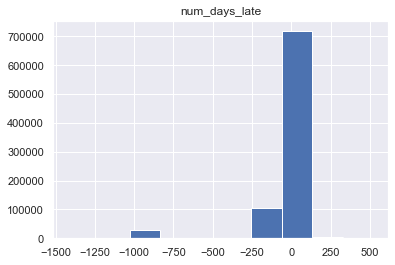

In [54]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'float64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [55]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts()) #prints actual count
    print(df[col].value_counts(normalize=True, dropna=False)) #prints %
    print('----------------------')


CRM_Listener    195416
svcCRMSS        113585
138650           27130
me05816          19840
NO10960          19832
                 ...  
SG26340              1
141954               1
cm26202              1
lb24838              1
MR25792              1
Name: source_id, Length: 164, dtype: int64
CRM_Listener                   0.23
svcCRMSS                       0.13
138650                         0.03
me05816                        0.02
NO10960                        0.02
                       ...         
SG26340                        0.00
141954                         0.00
cm26202                        0.00
lb24838                        0.00
MR25792                        0.00
Name: source_id, Length: 164, dtype: float64
----------------------
Code Enforcement                 274298
Waste Collection                 220696
Field Operations                 119362
Miscellaneous                     46165
Streets                           39193
Signals                           21095


  5.00                   0.08
  7.00                   0.08
  2.00                   0.07
 14.00                   0.05
  3.00                   0.04
                 ...         
  8.90                   0.00
129.91                   0.00
  3.91                   0.00
  7.92                   0.00
  3.66                   0.00
Name: SLA_days, Length: 149040, dtype: float64
----------------------
Closed                       836928
Open                          18333
 78212"                           4
Code Enforcement Services         1
 78210"                           1
 78201"                           1
 78223"                           1
Name: case_status, dtype: int64
Closed                                      0.98
Open                                        0.02
 78212"                                     0.00
Code Enforcement Services                   0.00
 78210"                                     0.00
 78201"                                     0.00
 78223"               

# PREP & CLEAN
#### get rid of nulls, arrange by date, change dates to a date format, drop some columns, rename some columns, encode columns

In [56]:
# convert our date column to datetime type
pd.to_datetime(df.case_opened_date)
df.dtypes





source_id                  object
dept_division              object
case_id                     int64
case_opened_date           object
case_closed_date           object
SLA_due_date               object
case_late                  object
num_days_late             float64
case_closed                object
service_request_type       object
SLA_days                   object
case_status                object
request_address            object
council_district           object
dept_name                  object
standardized_dept_name     object
dept_subject_to_SLA        object
index                      object
source_username            object
dtype: object

In [57]:
# convert our date column to datetime type
pd.to_datetime(df.case_closed_date)
df.dtypes

source_id                  object
dept_division              object
case_id                     int64
case_opened_date           object
case_closed_date           object
SLA_due_date               object
case_late                  object
num_days_late             float64
case_closed                object
service_request_type       object
SLA_days                   object
case_status                object
request_address            object
council_district           object
dept_name                  object
standardized_dept_name     object
dept_subject_to_SLA        object
index                      object
source_username            object
dtype: object

In [58]:
# convert our date column to datetime type
pd.to_datetime(df.SLA_due_date)
df.dtypes

source_id                  object
dept_division              object
case_id                     int64
case_opened_date           object
case_closed_date           object
SLA_due_date               object
case_late                  object
num_days_late             float64
case_closed                object
service_request_type       object
SLA_days                   object
case_status                object
request_address            object
council_district           object
dept_name                  object
standardized_dept_name     object
dept_subject_to_SLA        object
index                      object
source_username            object
dtype: object

In [59]:
df = df.drop_duplicates()
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)


number of duplicate rows:  (0, 19)


In [62]:
# Total number of rows and columns
df.shape

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)


number of duplicate rows:  (0, 19)


In [63]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
0,139344,Miscellaneous,1014127378,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
1,139344,Field Operations,1014127380,1/1/18 8:39,1/1/18 12:30,9/26/20 8:39,NO,-998.84,YES,Stray Animal,999.00,Closed,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
2,139344,Signals,1014127389,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
3,139344,Streets,1014127390,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
4,139344,Signals,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza


In [64]:
df.shape

(855193, 19)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855193 entries, 0 to 855268
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   source_id               855193 non-null  object 
 1   dept_division           855193 non-null  object 
 2   case_id                 855193 non-null  int64  
 3   case_opened_date        855193 non-null  object 
 4   case_closed_date        836862 non-null  object 
 5   SLA_due_date            855159 non-null  object 
 6   case_late               855193 non-null  object 
 7   num_days_late           855159 non-null  float64
 8   case_closed             855193 non-null  object 
 9   service_request_type    855193 non-null  object 
 10  SLA_days                855159 non-null  object 
 11  case_status             855193 non-null  object 
 12  request_address         855193 non-null  object 
 13  council_district        855193 non-null  object 
 14  dept_name           

In [66]:
# number null values in each column
df.isnull().sum()

source_id                     0
dept_division                 0
case_id                       0
case_opened_date              0
case_closed_date          18331
SLA_due_date                 34
case_late                     0
num_days_late                34
case_closed                   0
service_request_type          0
SLA_days                     34
case_status                   0
request_address               0
council_district              0
dept_name                   198
standardized_dept_name        0
dept_subject_to_SLA           1
index                         1
source_username               8
dtype: int64

In [67]:
missing = df.isnull().sum()
missing[missing >0]

case_closed_date       18331
SLA_due_date              34
num_days_late             34
SLA_days                  34
dept_name                198
dept_subject_to_SLA        1
index                      1
source_username            8
dtype: int64

In [68]:
# Dropping the missing values.
df = df.dropna() 
df.count()

source_id                 836708
dept_division             836708
case_id                   836708
case_opened_date          836708
case_closed_date          836708
SLA_due_date              836708
case_late                 836708
num_days_late             836708
case_closed               836708
service_request_type      836708
SLA_days                  836708
case_status               836708
request_address           836708
council_district          836708
dept_name                 836708
standardized_dept_name    836708
dept_subject_to_SLA       836708
index                     836708
source_username           836708
dtype: int64

<AxesSubplot:xlabel='num_days_late'>

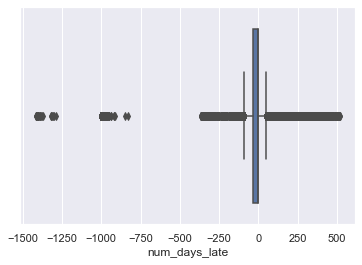

In [69]:
#Detecting Outliers with IQR score technique
sns.boxplot(x=df['num_days_late'])

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


case_id                   756,095.75
num_days_late                  35.02
dtype: float64


In [71]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(761283, 19)

KeyboardInterrupt: 

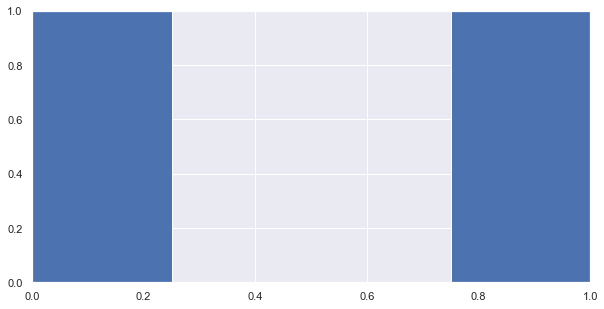

In [74]:
# Plotting a Histogram by plotting different features against one 
#another (scatter), against frequency (histogram)

df.num_days_late.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of days late by department')
plt.ylabel('num_days_late')
plt.xlabel('dept_name');


,case_id,num_days_late
case_id,1.00,-0.00
num_days_late,-0.00,1.00


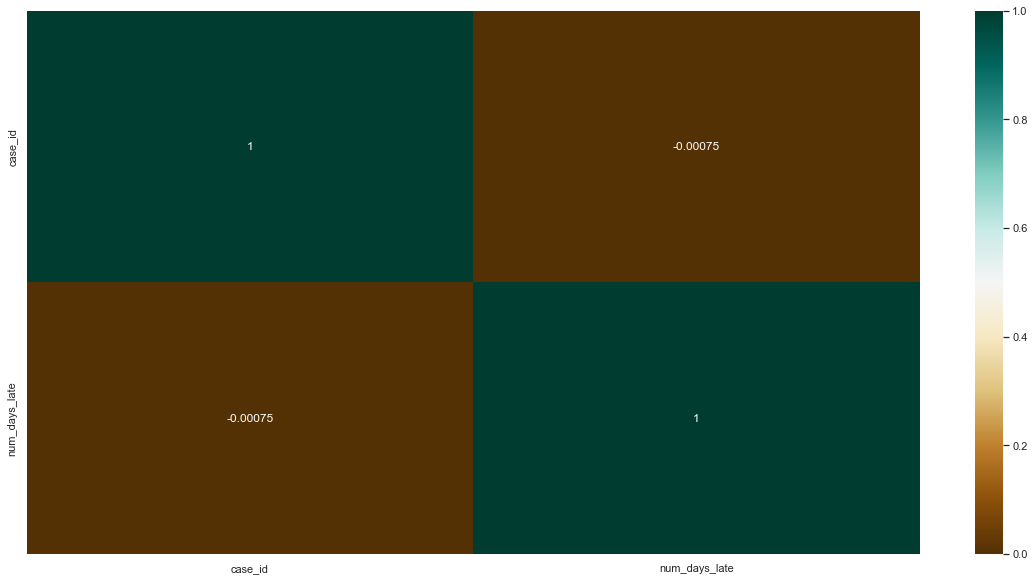

In [75]:
# Finding the relations between the variables by using Heat Maps is a 
#type of plot which is necessary when we need to find the dependent 
#variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

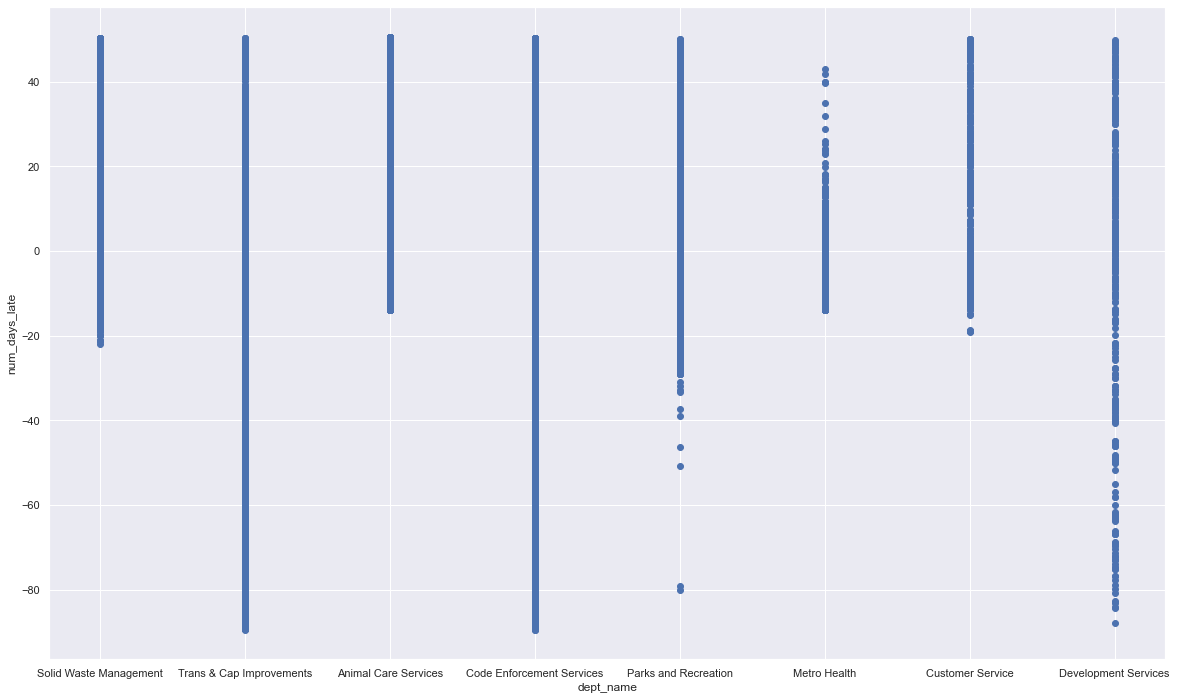

In [76]:
# Plotting a scatter plot to find the correlation between two variables.
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(df['dept_name'], df['num_days_late'])
ax.set_xlabel('dept_name')
ax.set_ylabel('num_days_late')
plt.show()

<AxesSubplot:>

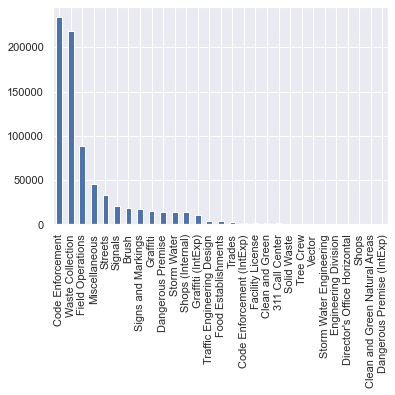

In [77]:
df['dept_division'].value_counts().plot(kind='bar')

<AxesSubplot:>

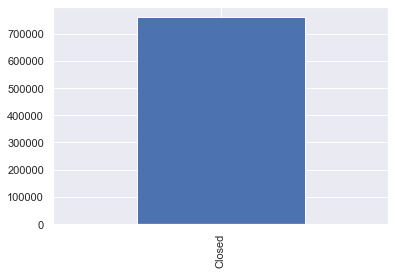

In [78]:
df['case_status'].value_counts().plot(kind='bar')

In [79]:
df['council_district'] = df['council_district'].astype(str)

In [80]:
df.council_district.unique()

array(['6', '5', '1', '7', '2', '4', '3', '10', '8', '9', '0'],
      dtype=object)

In [81]:
df.council_district.nunique()

11

<AxesSubplot:>

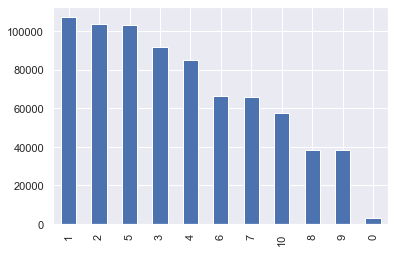

In [82]:
df['council_district'].value_counts().plot(kind='bar')

<AxesSubplot:>

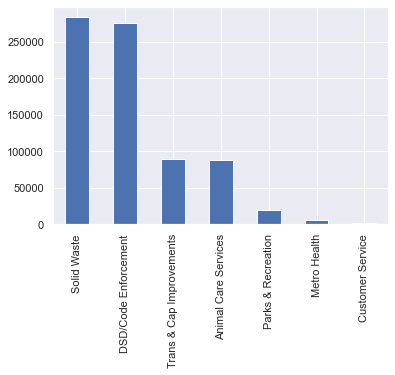

In [86]:
df['standardized_dept_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

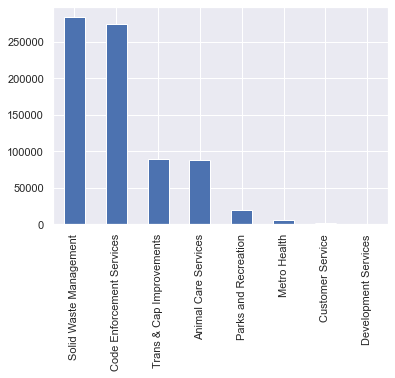

In [85]:
df['dept_name'].value_counts().plot(kind='bar')

In [87]:
df['dept_name'].value_counts()

Solid Waste Management       283763
Code Enforcement Services    274710
Trans & Cap Improvements      89056
Animal Care Services          88128
Parks and Recreation          18919
Metro Health                   5218
Customer Service               1100
Development Services            389
Name: dept_name, dtype: int64

In [89]:
df['dept_subject_to_SLA'].value_counts()

YES    761283
Name: dept_subject_to_SLA, dtype: int64

In [90]:
df.dept_subject_to_SLA.unique()

array(['YES'], dtype=object)

In [91]:
df.case_status.unique()

array(['Closed'], dtype=object)

In [83]:
df.columns


Index(['source_id', 'dept_division', 'case_id', 'case_opened_date',
       'case_closed_date', 'SLA_due_date', 'case_late', 'num_days_late',
       'case_closed', 'service_request_type', 'SLA_days', 'case_status',
       'request_address', 'council_district', 'dept_name',
       'standardized_dept_name', 'dept_subject_to_SLA', 'index',
       'source_username'],
      dtype='object')

In [92]:
df=df.drop(columns=['index', 'source_username', 'source_id', 'case_id','dept_name' ])

In [93]:
df.head()

,dept_division,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,standardized_dept_name,dept_subject_to_SLA
0,Miscellaneous,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste,YES
2,Signals,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,YES
3,Streets,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,YES
4,Signals,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,YES
5,Field Operations,1/1/18 9:30,1/2/18 16:00,1/6/18 9:30,NO,-3.73,YES,Animal Neglect,5.00,Closed,"254 GLOBE AVE, San Antonio, 78228",7,Animal Care Services,YES


# EDA